In [1]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

In [2]:
input_img ='1.jpg'

In [3]:
transform = A.Compose([
    ## brightness, contrast
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(-0.4, 0.4), contrast_limit=(-0.4, 0.4), brightness_by_max=False),
    ## rotation
    A.SafeRotate(always_apply=True, p=1.0, limit=(-10, 10), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    ## noise
    A.GaussNoise(always_apply=True, p=1.0, var_limit=(100.0, 200.0)),
    ## colorjitter
    A.ColorJitter (always_apply=True ,brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=0.5)
])
transform_o = A.Compose([
    A.Resize(height = 400, width = 256)
])

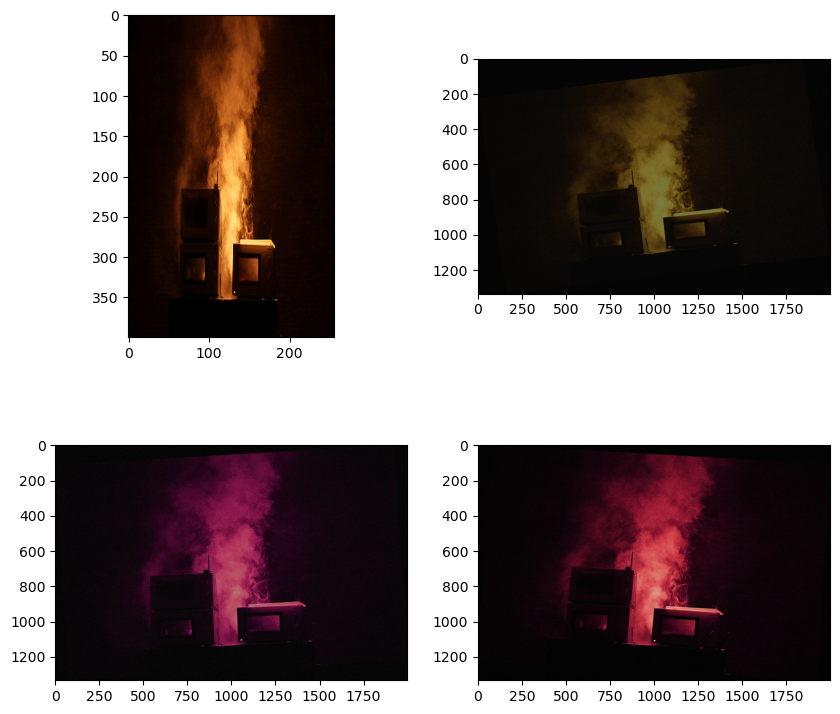

In [4]:
plt.figure(figsize=(10,200))
im_bgr = cv2.imread(input_img)
img = im_bgr[:, :, ::-1]
plt.subplot(40,2,1)
plt.imshow(transform_o(image=img)['image'], cmap=plt.cm.binary)
for i in range(1,4):
    
    
    plt.grid(False)
    plt.subplot(40,2,i+1)
    plt.imshow(transform(image=img)["image"], cmap=plt.cm.binary)

plt.show()